<a href="https://colab.research.google.com/github/jchou03/art_era_ai/blob/main/art_era_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA UPLOAD

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import drive
from google.colab import files
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image
import matplotlib.pylab as plt
import random
from random import sample
import zipfile
from PIL import Image
import os
import numpy as np
import seaborn as sns


drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Colab Data/art_era_ai_df.csv')
df.info()

dfextension = pd.read_csv('/content/drive/MyDrive/Colab Data/GuggenheimScrape.csv')
dfextension.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 7 columns):
 #   Column                                                                                     Non-Null Count  Dtype 
---  ------                                                                                     --------------  ----- 
 0   https://www.artic.edu/iiif/2/a28e4e8f-f072-092a-52f9-b165c97c7a0a/full/600,/0/default.jpg  699 non-null    int64 
 1   Title                                                                                      699 non-null    object
 2   Year                                                                                       699 non-null    int64 
 3   Title_URL                                                                                  699 non-null    object
 4   Image                                           

In [3]:
dfextension["Decade"] = dfextension['Text'].str.extract(r'(\d{4})', expand=False)
dfextension["Decade"] = dfextension["Decade"].astype(int)
dfextension.head()

,Title,Title_URL,Image,Field,Text,Decade
0,Alexander Archipenko,https://www.guggenheim.org/artwork/248,https://www.guggenheim.org/wp-content/uploads/...,Vase Woman II,Art from the 1910s,1910
1,Alexander Archipenko,https://www.guggenheim.org/artwork/246,https://www.guggenheim.org/wp-content/uploads/...,Médrano II,Art from the 1910s,1910
2,Alexander Archipenko,https://www.guggenheim.org/artwork/245,https://www.guggenheim.org/wp-content/uploads/...,Carrousel Pierrot,Art from the 1910s,1910
3,Giacomo Balla,https://www.guggenheim.org/artwork/302,https://www.guggenheim.org/wp-content/uploads/...,Spring,Art from the 1910s,1910
4,Giacomo Balla,https://www.guggenheim.org/artwork/300,https://www.guggenheim.org/wp-content/uploads/...,Abstract Speed + Sound,Art from the 1910s,1910


In [4]:
import re
def extract_year_from_title(title):
    # Use regular expressions to find a 4-digit number in the title
    match = re.search(r'\b\d{4}\b', title)
    if match:
        year = int(match.group(0))
        return year
    else:
        match = re.search(r'(\d{4})s', title)
        if match:
          year = int(match.group(1))
          return year
        else:
          print("fail")


def getdecade(df):
  decade = []
  for i in range(len(df)):
    (title, year) = df.loc[i, "Title"], df.loc[i, "Year"]
    if year != 1972:
      decadeval = year - (year % 10)
      #print(decadeval, year)
      decade.append(decadeval)
    else:
      newyear = extract_year_from_title(title)
      decadeval = newyear - (newyear % 10)
      #print(decadeval, year)
      decade.append(decadeval)
  return decade


df['Decade'] = getdecade(df)
df = df.replace(4650, 1950)

# Visuals

In [ ]:
grouped_data = df['Artist'].value_counts().reset_index()
grouped_data.columns = ['Group', 'Count']
grouped_data = grouped_data[grouped_data['Count'] >= 6]
plt.bar(grouped_data['Group'], grouped_data['Count'])
plt.xlabel('Artist')
plt.xticks(rotation=90)
plt.ylabel('# of Pieces by Given Artist')
plt.title('# of Art Pieces by An Artist Within our Dataset Greater than Six')
plt.show()


In [ ]:
#df.groupby(['Decade']).count()
x = ['1910', '1950', '1960', '1970', '1980', '1990', '2000', '2010']
y = [2, 158, 193, 101, 105, 86, 47, 8]
plt.bar(x, y)

# Labels

In [5]:
labels_dict = {
    1910: 0,
    1950: 1,
    1960: 2,
    1970: 3,
    1980: 4,
    1990: 5,
    2000: 6,
    2010: 7
}

In [6]:
labels = df["Decade"].to_list()
images = df['Image']
bw_labels = labels.copy()
print(type(labels))
len(labels)

<class 'list'>


699

In [7]:
dfex_labels = dfextension["Decade"].to_list()
dfex_images = dfextension['Image']
bw_dfex_labels = dfex_labels.copy()
print(type(dfex_images))
len(dfex_labels)

<class 'pandas.core.series.Series'>


1488

# Sizing

In [8]:
def resize(sample, labeltype):
  crop_img_list = []
  for i, url in enumerate(sample):
    try:
      image = io.imread(url)
      # print("shape is: " + str(image.shape))
      width =  image.shape[1]
      height = image.shape[0]
      if width == height:
          #cv2_imshow(cv.resize(image, (255, 255), interpolation = cv.INTER_AREA)
          crop_img_list.append(cv.resize(image, (255, 255), interpolation = cv.INTER_AREA))
          #print(image.shape)
          #print("here")
      else:
        mid_x, mid_y = int(width/2), int(height/2)
        if 255 < width:
            crop_width = int(255/2)
            if 255 < height:
                crop_height = int(255/2)
                crop_img = image[mid_y-crop_height:mid_y+crop_height, mid_x-crop_width:mid_x+crop_width]
            else:
                crop_height = int(crop_height/2)
                crop_img = image[mid_y-crop_height:mid_y+crop_height, mid_x-crop_width:mid_x+crop_width]
        else:
            if 255 < height:
                crop_width = int(crop_width/2)
                crop_height = int(255/2)
                crop_img = image[mid_y-crop_height:mid_y+crop_height, mid_x-crop_width:mid_x+crop_width]
            else:
                crop_width = int(crop_width/2)
                crop_height = int(crop_height/2)
                crop_img = image[mid_y-crop_height:mid_y+crop_height, mid_x-crop_width:mid_x+crop_width]
        crop_img = cv.resize(crop_img, (255, 255), interpolation = cv.INTER_AREA)
        # print("crop_image shape: " + str(crop_img.shape))
        crop_img_list.append(crop_img)
        #print(image.shape)
    except:
      print("Issue with resizing image: " + str(url))
      # remove the label from labels
      labeltype.pop(i)
  return crop_img_list
    #cv2_imshow(crop_img)
    #print('\n')


"""result = resize(sample)
cv2_imshow(result[2])"""

'result = resize(sample)\ncv2_imshow(result[2])'

In [9]:
def BW_convert(sample):
  BW_img_list = []
  for i, url in enumerate(sample):
    try:
      image = io.imread(url)
      gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
      crop_gray = cv.resize(gray, (255, 255), interpolation = cv.INTER_AREA)
      BW_img_list.append(crop_gray)
    except:
      print("Issue with converting image: " + str(url))
      # remove the label from labels
      bw_labels.pop(i)
  return BW_img_list


In [ ]:
# resize all images
BW = BW_convert(images)
print(len(BW))
# img_array = np.array(img_array)

In [10]:
print("label length before", len(labels))
print("images length before", len(images))
resized_imgs = resize(images, labels)
print("label length after", len(labels))
print("img length after",len(resized_imgs))

label length before 699
images length before 699
label length after 699
img length after 699


In [11]:
print("images length", len(dfex_images))
print("labels length", len(dfex_labels))
resized_dfex_imgs = resize(dfex_images, dfex_labels)
print("img length after", len(resized_dfex_imgs))
print("label length after", len(dfex_labels))

images length 1488
labels length 1488
img length after 1488
label length after 1488


In [12]:
# print(img_array)
# convert to np array
print("label length after", len(labels))
print("img length after",len(resized_imgs))
print(resized_imgs[0].shape)
print(len(resized_imgs[0]))
print(len(resized_imgs[0][0]))
print(len(resized_imgs[0][0][0]))
for i, img in enumerate(resized_imgs):
  if img.shape != (255, 255, 3):
    resized_imgs.pop(i)
    labels.pop(i)
    print("shape error with image " + str(i))
    print(img.shape)
    # print(img)
    # image = io.imread(url)
    # cv2_imshow(io.imread(images[i]))
img_array = np.array(resized_imgs)
print("label length after", len(labels))
print("img length after",len(img_array))
print(img_array.shape)

label length after 699
img length after 699
(255, 255, 3)
255
255
3
shape error with image 130
(255, 255)
shape error with image 366
(255, 255)
shape error with image 482
(255, 255)
label length after 696
img length after 696
(696, 255, 255, 3)


This one has an issue and you have to rerun 3 - 4 to get it to compile.

In [16]:
# print(img_array)
# convert to np array
print(len(resized_dfex_imgs))
print(len(dfex_labels))
print(resized_dfex_imgs[0].shape)
print(len(resized_dfex_imgs[0]))
print(len(resized_dfex_imgs[0][0]))
print(len(resized_dfex_imgs[0][0][0]))
for i, img in enumerate(resized_dfex_imgs):
  if img.shape != (255, 255, 3):
    resized_dfex_imgs.pop(i)
    dfex_labels.pop(i)
    print("shape error with image " + str(i))
    print(img.shape)
    # print(img)
    # image = io.imread(url)
    # cv2_imshow(io.imread(images[i]))
dfex_img_array = np.array(resized_dfex_imgs)
print(dfex_img_array.shape)
print(len(resized_dfex_imgs))
print(len(dfex_labels))

1402
1402
(255, 255, 3)
255
255
3
shape error with image 901
(255, 255)
(1401, 255, 255, 3)
1401
1401


In [ ]:
# print(img_array)
# convert to np array
print(BW[0].shape)
print(len(BW[0]))
print(len(BW[0][0]))
for i, img in enumerate(BW):
  if img.shape != (255, 255):
    BW.pop(i)
    bw_labels.pop(i)
    print("shape error with image " + str(i))
    print(img.shape)
    # print(img)
    # image = io.imread(url)
    cv2_imshow(io.imread(BW[i]))
bw_img_array = np.array(BW)
print(bw_img_array.shape)

In [17]:
# convert labels to dict ids
print("label length before", len(labels))
print("img length before",len(img_array))
print(type(labels))
transformed_labels = list(map(lambda x: labels_dict[x], labels))
# print(type(transformed_labels))
print("label length after", len(transformed_labels))
print("img length after",len(img_array))
# print(transformed_labels)



label length before 696
img length before 696
<class 'list'>
label length after 696
img length after 696


In [18]:
# convert labels to dict ids
print(type(dfex_labels))
"dfex_labels = list(map(int, dfex_labels))"
dfex_transformed_labels = list(map(lambda x: labels_dict[x], dfex_labels))
# print(type(transformed_labels))
print(len(dfex_transformed_labels))
# print(transformed_labels)


<class 'list'>
1401


In [ ]:
# convert BW labels to dict ids
print(type(bw_labels))

bw_transformed_labels = list(map(lambda x: labels_dict[x], bw_labels))
# print(type(transformed_labels))
print(len(bw_transformed_labels))
# print(transformed_labels)
len(bw_img_array)

In [19]:
comb_transformed_labels = transformed_labels + dfex_transformed_labels
comb_img_array = np.concatenate((img_array, dfex_img_array), axis=0)
print(len(comb_transformed_labels))
print(len(comb_img_array))

2097
2097


# Neural Networks!

## Creating train & test set

(255, 255, 3)


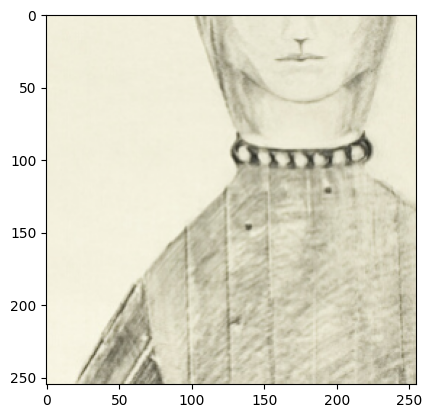

In [47]:
from sklearn.model_selection import train_test_split
from tensorflow import keras

x_train, x_test, y_train, y_test = train_test_split(img_array, transformed_labels, test_size=0.3)

print(x_train[0].shape)

x_train = x_train/255.0
x_test = x_test/255.0

"""x_train = x_train.reshape((-1,28,28, 3)) #NOT SURE IF WE NEED
x_test = x_test.reshape((-1,28,28, 3)) #NOT SURE IF WE NEED
"""

plt.imshow(x_train[0])

#ERROR OUT OF BOUNDS BC DIMENSIONS AREN'T RIGHT
num_classes = 8
# y_train = pd.DataFrame(data=y_train)
# y_test = pd.DataFrame(data=y_test)
# y_train = pd.DataFrame(index=np.arange(700))
# y_test = pd.DataFrame(index=np.arange(700))
y_train = keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes=num_classes)



In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow import keras

bw_x_train, bw_x_test, bw_y_train, bw_y_test = train_test_split(bw_img_array, bw_transformed_labels, test_size=0.3)

print(bw_x_train[0].shape)

bw_x_train = bw_x_train/255.0
bw_x_test = bw_x_test/255.0

"""x_train = x_train.reshape((-1,28,28, 3)) #NOT SURE IF WE NEED
x_test = x_test.reshape((-1,28,28, 3)) #NOT SURE IF WE NEED
"""

plt.imshow(bw_x_train[0])

#ERROR OUT OF BOUNDS BC DIMENSIONS AREN'T RIGHT
num_classes = 8
# y_train = pd.DataFrame(data=y_train)
# y_test = pd.DataFrame(data=y_test)
# y_train = pd.DataFrame(index=np.arange(700))
# y_test = pd.DataFrame(index=np.arange(700))
bw_y_train = keras.utils.to_categorical(bw_y_train, num_classes=num_classes)
bw_y_test = keras.utils.to_categorical(bw_y_test, num_classes=num_classes)


(255, 255, 3)


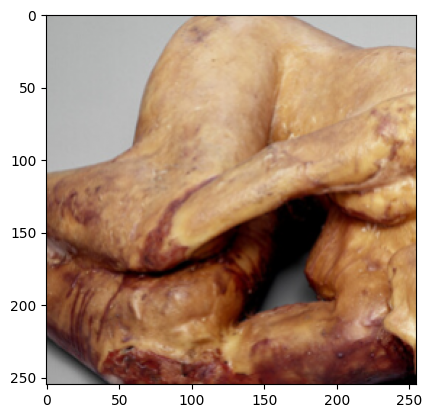

In [20]:
from sklearn.model_selection import train_test_split
from tensorflow import keras

comb_x_train, comb_x_test, comb_y_train, comb_y_test = train_test_split(comb_img_array, comb_transformed_labels, test_size=0.3)

print(comb_x_train[0].shape)

comb_x_train = comb_x_train/255.0
comb_x_test = comb_x_test/255.0

"""x_train = x_train.reshape((-1,28,28, 3)) #NOT SURE IF WE NEED
x_test = x_test.reshape((-1,28,28, 3)) #NOT SURE IF WE NEED
"""

plt.imshow(comb_x_train[0])

#ERROR OUT OF BOUNDS BC DIMENSIONS AREN'T RIGHT
num_classes = 8
# y_train = pd.DataFrame(data=y_train)
# y_test = pd.DataFrame(data=y_test)
# y_train = pd.DataFrame(index=np.arange(700))
# y_test = pd.DataFrame(index=np.arange(700))
comb_y_train = keras.utils.to_categorical(comb_y_train, num_classes=num_classes)
comb_y_test = keras.utils.to_categorical(comb_y_test, num_classes=num_classes)


## Architecture One

In [22]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
#input_shape = (-1,28,28)
#input_shape = (28,28,1)


model1 = keras.Sequential(
    [
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(255, 255, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="sigmoid"),
    ]
)

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 253, 253, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 246016)            0         
                                                                 
 dropout (Dropout)           (None, 246016)            0

## Architecture Two

In [23]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

model2 = keras.Sequential(
    [
        layers.RandomFlip("horizontal", input_shape=(255,255,3)),
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(255, 255, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', input_shape=(255, 255, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="sigmoid"),
    ]
)

"""model2.summary()"""
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 255, 255, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 253, 253, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 126, 126, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 60, 60, 128)      

## Architecture Three

In [3]:
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from keras.models import Model
from tensorflow.keras import layers
# preprocess_input subtracts pixel mean values from the inputs,
# which is what VGG16 expected
from tensorflow.keras.applications.vgg16 import preprocess_input
import tensorflow_datasets as tfds


model3 = VGG16(include_top=False, input_shape=(255, 255, 3)) # we'll replace the "top" with our own layers
for layer in model3.layers:
    layer.trainable = False  # these won't learn
# add new classifier layers
flat = layers.Flatten()(model3.layers[-1].output) # connect to last layer of VGG
drop1 = layers.Dropout(0.5)(flat)
cls = layers.Dense(128, activation='relu')(drop1)
drop2 = layers.Dropout(0.5)(cls)
output = layers.Dense(num_classes, activation="sigmoid")(drop2)  #SIGMOID CHANGE
# define new model
model3 = Model(inputs=model3.inputs, outputs=output)


# compile model

model3.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy']) #BINARY CROSS CHANGE



NameError: ignored

##Architecture Four

In [25]:
model4 = keras.Sequential(
    [
        layers.Input(shape=(255, 255, 3)),
        layers.RandomFlip("horizontal"),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.Dense(num_classes, activation='sigmoid'),
    ]
)

model4.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_1 (RandomFlip)  (None, 255, 255, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 253, 253, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 253, 253, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 126, 126, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 124, 124, 64)     

# Original Dataset Testing

In [ ]:
batch_size = 128
epochs = 50
model4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model4.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

In [ ]:
batch_size = 128
epochs = 15
model4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model4.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

In [ ]:
#FIT
model3.fit(x_train, y_train, batch_size=128, epochs=30, validation_split=0.1)

In [ ]:
batch_size = 128
epochs = 30
model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

In [ ]:
# running architecture 2, more epochs
# batch_size = 128
# epochs = 30
# model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# model2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

In [ ]:
# running architecture 2
batch_size = 128
epochs = 15
model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Combined Dataset Testing

comb_x_train, comb_x_test, comb_y_train, comb_y_test

In [26]:
# running architecture 1
batch_size = 128
epochs = 15
model1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model1.fit(comb_x_train, comb_y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
11/11 [==============================] - 78s 7s/step - loss: 0.7997 - accuracy: 0.1538 - val_loss: 0.4477 - val_accuracy: 0.1769
Epoch 2/15
11/11 [==============================] - 75s 7s/step - loss: 0.4101 - accuracy: 0.1705 - val_loss: 0.3920 - val_accuracy: 0.1497
Epoch 3/15
11/11 [==============================] - 75s 7s/step - loss: 0.3829 - accuracy: 0.2008 - val_loss: 0.3824 - val_accuracy: 0.1497
Epoch 4/15
11/11 [==============================] - 75s 7s/step - loss: 0.3719 - accuracy: 0.2152 - val_loss: 0.3810 - val_accuracy: 0.1701
Epoch 5/15
11/11 [==============================] - 75s 7s/step - loss: 0.3617 - accuracy: 0.2553 - val_loss: 0.3829 - val_accuracy: 0.1905
Epoch 6/15
11/11 [==============================] - 75s 7s/step - loss: 0.3499 - accuracy: 0.3212 - val_loss: 0.3787 - val_accuracy: 0.2245
Epoch 7/15
11/11 [==============================] - 75s 7s/step - loss: 0.3346 - accuracy: 0.3697 - val_loss: 0.3839 - val_accuracy: 0.2041
Epoch 8/15
11/11 [==

In [27]:
# running architecture 1
batch_size = 128
epochs = 30
model1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model1.fit(comb_x_train, comb_y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/30
11/11 [==============================] - 77s 7s/step - loss: 0.1563 - accuracy: 0.8023 - val_loss: 0.5492 - val_accuracy: 0.1020
Epoch 2/30
11/11 [==============================] - 75s 7s/step - loss: 0.1244 - accuracy: 0.8598 - val_loss: 0.5678 - val_accuracy: 0.1293
Epoch 3/30
11/11 [==============================] - 76s 7s/step - loss: 0.0997 - accuracy: 0.8856 - val_loss: 0.6405 - val_accuracy: 0.1565
Epoch 4/30
11/11 [==============================] - 76s 7s/step - loss: 0.0842 - accuracy: 0.9030 - val_loss: 0.6832 - val_accuracy: 0.1701
Epoch 5/30
11/11 [==============================] - 75s 7s/step - loss: 0.0774 - accuracy: 0.9121 - val_loss: 0.7062 - val_accuracy: 0.1633
Epoch 6/30
11/11 [==============================] - 76s 7s/step - loss: 0.0697 - accuracy: 0.9242 - val_loss: 0.7175 - val_accuracy: 0.1905
Epoch 7/30
11/11 [==============================] - 75s 7s/step - loss: 0.0642 - accuracy: 0.9318 - val_loss: 0.7468 - val_accuracy: 0.1497
Epoch 8/30
11/11 [==

KeyboardInterrupt: ignored

In [ ]:
# running architecture 1
batch_size = 128
epochs = 50
model1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model1.fit(comb_x_train, comb_y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

In [ ]:
# running architecture 2
batch_size = 128
epochs = 15
model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model2.fit(comb_x_train, comb_y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

In [ ]:
# running architecture 2
batch_size = 128
epochs = 30
model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model2.fit(comb_x_train, comb_y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

In [ ]:
# running architecture 2
batch_size = 128
epochs = 50
model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model2.fit(comb_x_train, comb_y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

In [2]:
model3.fit(comb_x_train, comb_y_train, batch_size=128, epochs=15, validation_split=0.1)

NameError: ignored

In [ ]:
batch_size = 128
epochs = 15
model4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model4.fit(comb_x_train, comb_y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

#Black & White Testing

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
#input_shape = (-1,28,28)
#input_shape = (28,28,1)


model1bw = keras.Sequential(
    [
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(255, 255, 1)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="sigmoid"),
    ]
)

model1.summary()

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

model2bw = keras.Sequential(
    [
        layers.RandomFlip("horizontal", input_shape=(255,255,1)),
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(255, 255, 1)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', input_shape=(255, 255, 1)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="sigmoid"),
    ]
)

"""model2bw.summary()"""


In [ ]:
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from keras.models import Model
from tensorflow.keras import layers
# preprocess_input subtracts pixel mean values from the inputs,
# which is what VGG16 expected
from tensorflow.keras.applications.vgg16 import preprocess_input
import tensorflow_datasets as tfds


model3bw = VGG16(include_top=False, input_shape=(255, 255, 1)) # we'll replace the "top" with our own layers
for layer in model3bw.layers:
    layer.trainable = False  # these won't learn
# add new classifier layers
flat = layers.Flatten()(model3bw.layers[-1].output) # connect to last layer of VGG
drop1 = layers.Dropout(0.5)(flat)
cls = layers.Dense(128, activation='relu')(drop1)
drop2 = layers.Dropout(0.5)(cls)
output = layers.Dense(num_classes, activation="sigmoid")(drop2)  #SIGMOID CHANGE
# define new model
model3bw = Model(inputs=model3bw.inputs, outputs=output)


# compile model

model3bw.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy']) #BINARY CROSS CHANGE



In [ ]:
model4bw = keras.Sequential(
    [
        layers.Input(shape=(255, 255, 1)),
        layers.RandomFlip("horizontal"),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.Dense(num_classes, activation='sigmoid'),
    ]
)

model4bw.summary()


In [ ]:
# running architecture 1
batch_size = 128
epochs = 15
model1bw.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model1bw.fit(bw_x_train, bw_y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

In [ ]:
# running architecture 2, more epochs
batch_size = 128
epochs = 30
model2bw.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model2bw.fit(bw_x_train, bw_y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

In [ ]:
model3bw.fit(bw_x_train, bw_y_train, batch_size=128, epochs=30, validation_split=0.1)

In [ ]:
batch_size = 128
epochs = 15
model4bw.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model4bw.fit(bw_x_train, bw_y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Appendix

In [ ]:
def HSV_convert(sample):
  for url in sample:
    image = io.imread(url)
    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    cv2_imshow(hsv)
def sampling(images):
  for x in images:
      image = x
      cv2_imshow(image)
def invert_img(sample):
  for url in sample:
    image = io.imread(url)
    cv2_imshow(image)
    image = ~image
    cv2_imshow(image)
def get_largest(images):
  imageone = io.imread(images[0])
  maxwidth =  imageone.shape[1]
  maxheight = imageone.shape[0]
  for x in (images):
    image = io.imread(x)
    width =  image.shape[1]
    height = image.shape[0]
    if width > maxwidth:
        maxwidth = width
    if height > maxheight:
        maxheight = height
  return maxwidth, maxheight
def get_smallest(images):
  imageone = io.imread(images[0])
  minwidth =  imageone.shape[1]
  minheight = imageone.shape[0]
  for x in (images):
    image = io.imread(x)
    width =  image.shape[1]
    height = image.shape[0]
    if width < minwidth:
        minwidth = width
    if height < minheight:
        minheight = height
  return minwidth, minheight

from pandas.core.frame import DataFrame
from IPython.display import HTML
def Create_Link(df):
  i = 0
  for x in range(len(df)):
    input = df.loc[x, "Image"]
    #index = df.loc[x, "index"]
    html = f'<a href={input}>{i}</a>'
    df = df.replace(input, html)
    i += 1
  return df
